Classes in y before encoding: ['Serious' 'Slight' 'Fatal']
Classes in y after encoding: [1 2 0]
Training Accuracy: 0.50
Test Accuracy: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.54      0.05       574
           1       0.14      0.20      0.17      5989
           2       0.89      0.57      0.69     39633

    accuracy                           0.52     46196
   macro avg       0.35      0.44      0.30     46196
weighted avg       0.78      0.52      0.62     46196



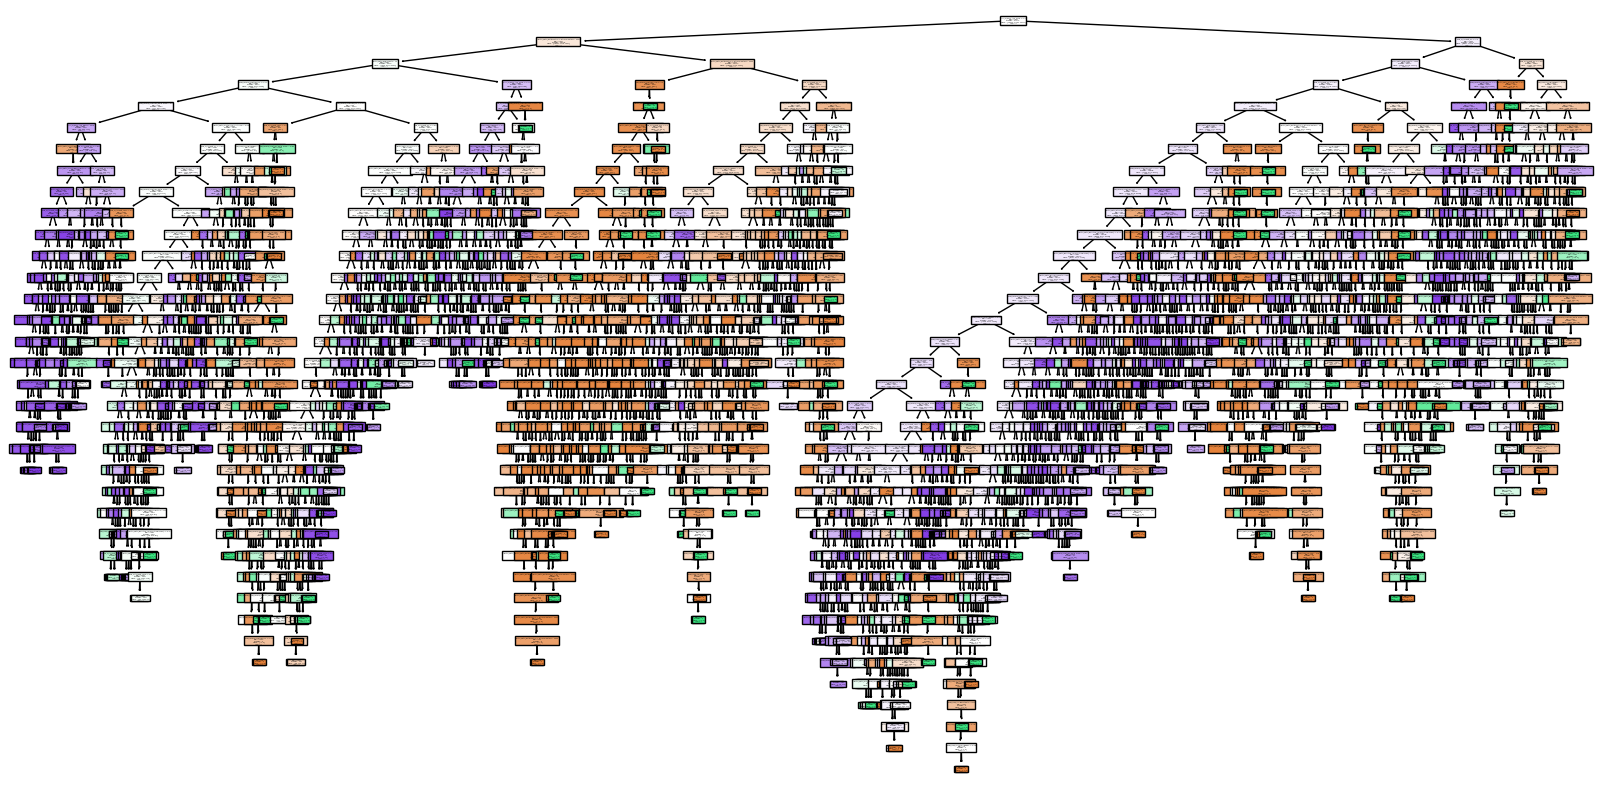

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Carregar os dados
df = pd.read_csv('car_accidentOFICIAL.csv')

# Selecionar as colunas relevantes
df = df[['Junction_Detail', 'Road_Surface_Conditions', 'Road_Type', 'Urban_or_Rural_Area', 'Hour_of_Accident', 'Accident_Injuries']]

# Remover valores ausentes
df.dropna(inplace=True)

# Codificar as colunas categóricas usando one-hot encoding
df = pd.get_dummies(df, columns=['Junction_Detail', 'Road_Surface_Conditions', 'Road_Type', 'Urban_or_Rural_Area', 'Hour_of_Accident'])

# Separar as colunas de entrada e a coluna de destino
X = df.drop(columns=['Accident_Injuries'])
y = df['Accident_Injuries']

# Verificar a codificação das classes em y
print("Classes in y before encoding:", y.unique())

# Garantir que y esteja codificado como números inteiros ou categorias (se necessário)
if y.dtype == 'object':
    y = y.astype('category').cat.codes

# Verificar a codificação das classes em y após possível ajuste
print("Classes in y after encoding:", y.unique())

# Converter todas as colunas de X para float
X = X.astype(float)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Aplicar SMOTE para oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Aplicar RandomUnderSampler para undersampling
undersample = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train_smote, y_train_smote)

# Inicializar e treinar o modelo de árvore de decisão
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

# Prever nos dados de teste
y_test_pred = dt.predict(X_test)

# Calcular a acurácia
test_accuracy = accuracy_score(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train_resampled, dt.predict(X_train_resampled))

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_test_pred))

# Visualizar a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=[str(c) for c in dt.classes_], filled=True)
plt.show()


<ipython-input-8-c122e338f756>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Classes in y before encoding: ['Serious' 'Slight' 'Fatal']
Classes in y after encoding: [1 2 0]
Training Accuracy: 0.35
Test Accuracy: 0.14
Classification Report:
              precision    recall  f1-score   support

           0       0.01      0.27      0.02       574
           1       0.13      0.70      0.23      5989
           2       0.89      0.06      0.11     39633

    accuracy                           0.14     46196
   macro avg       0.34      0.34      0.12     46196
weighted avg       0.78      0.14      0.12     46196



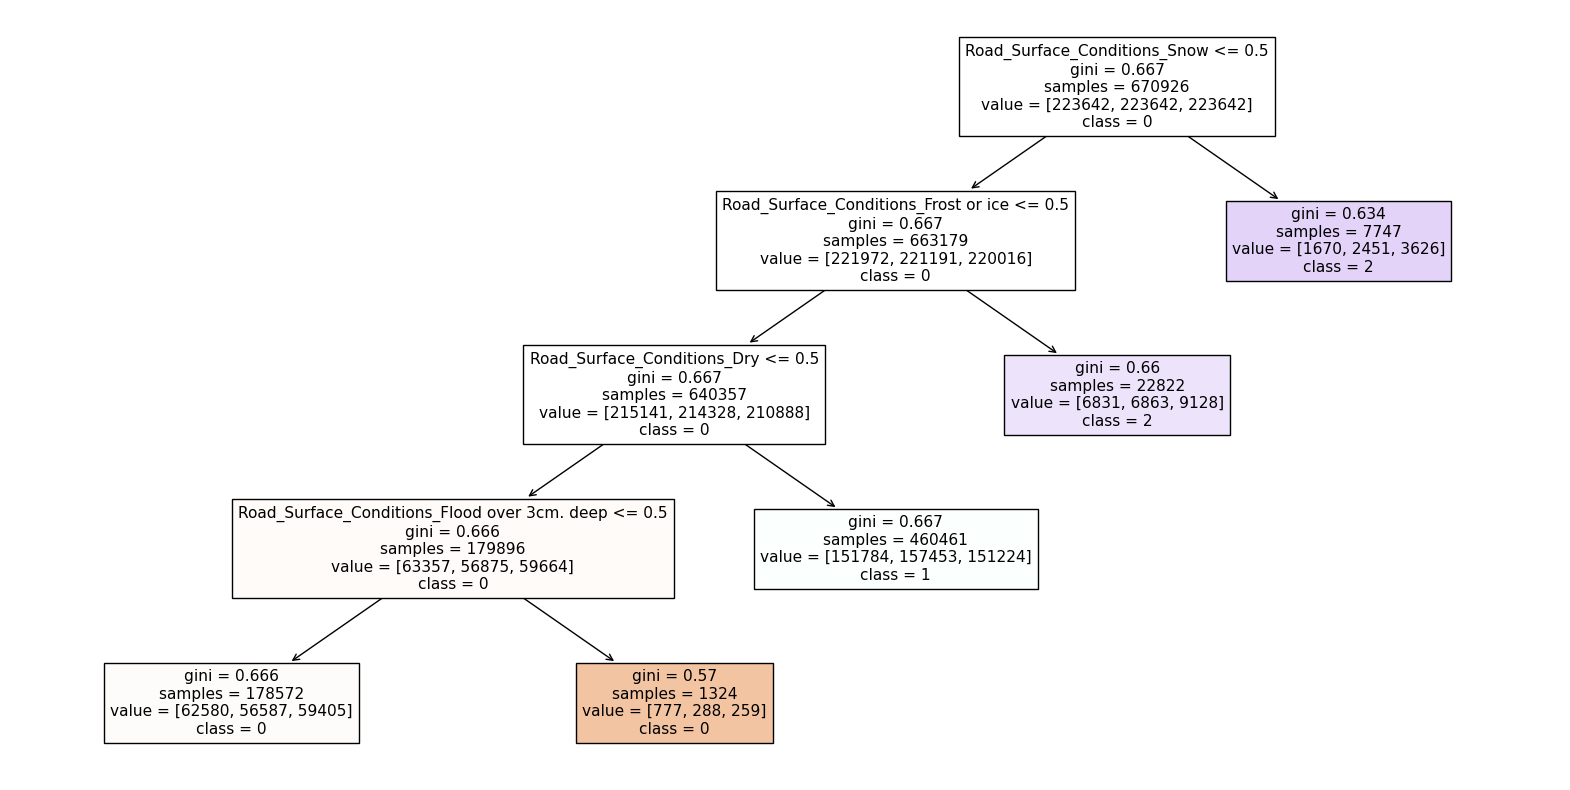

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Carregar os dados
df = pd.read_csv('car_accidentOFICIAL.csv')

# Selecionar as colunas relevantes
df = df[['Road_Surface_Conditions', 'Accident_Injuries']]

# Remover valores ausentes
df.dropna(inplace=True)

# Codificar as colunas categóricas usando one-hot encoding
df = pd.get_dummies(df, columns=['Road_Surface_Conditions'])

# Separar as colunas de entrada e a coluna de destino
X = df.drop(columns=['Accident_Injuries'])
y = df['Accident_Injuries']

# Verificar a codificação das classes em y
print("Classes in y before encoding:", y.unique())

# Garantir que y esteja codificado como números inteiros ou categorias (se necessário)
if y.dtype == 'object':
    y = y.astype('category').cat.codes

# Verificar a codificação das classes em y após possível ajuste
print("Classes in y after encoding:", y.unique())

# Converter todas as colunas de X para float
X = X.astype(float)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Aplicar SMOTE para oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Aplicar RandomUnderSampler para undersampling
undersample = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train_smote, y_train_smote)

# Inicializar e treinar o modelo de árvore de decisão
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

# Prever nos dados de teste
y_test_pred = dt.predict(X_test)

# Calcular a acurácia
test_accuracy = accuracy_score(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train_resampled, dt.predict(X_train_resampled))

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_test_pred))

# Visualizar a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=[str(c) for c in dt.classes_], filled=True)
plt.show()

Classes in y before encoding: ['Serious' 'Slight' 'Fatal']
Classes in y after encoding: [1 2 0]
Training Accuracy: 0.37
Test Accuracy: 0.20
Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.22      0.03       574
           1       0.14      0.79      0.23      5989
           2       0.90      0.11      0.19     39633

    accuracy                           0.20     46196
   macro avg       0.35      0.37      0.15     46196
weighted avg       0.79      0.20      0.19     46196



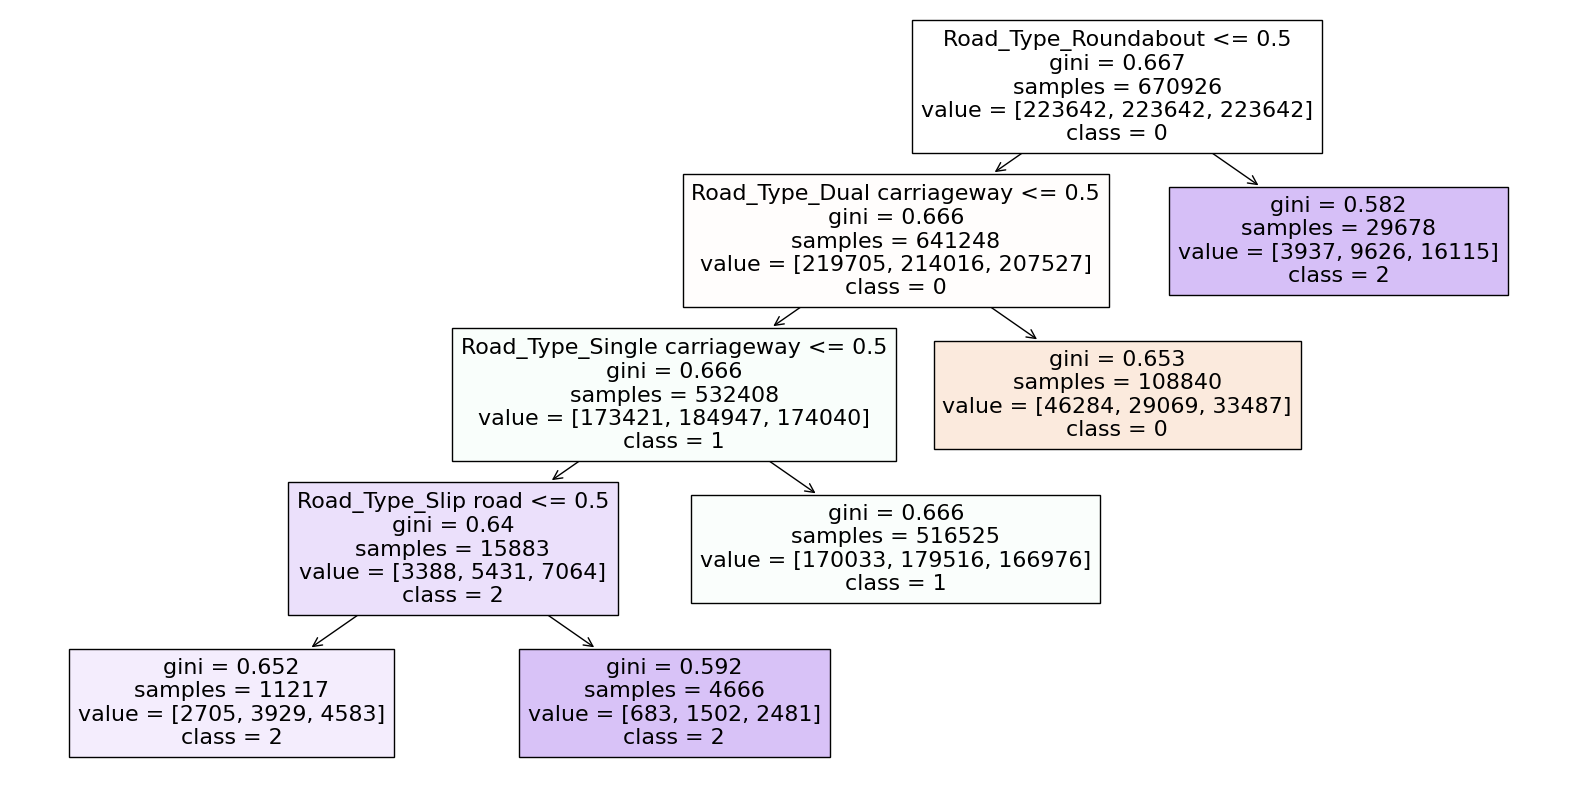

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Carregar os dados
df = pd.read_csv('car_accidentOFICIAL.csv')

# Selecionar as colunas relevantes
df = df[['Road_Type', 'Accident_Injuries']]

# Remover valores ausentes
df.dropna(inplace=True)

# Codificar as colunas categóricas usando one-hot encoding
df = pd.get_dummies(df, columns=['Road_Type'])

# Separar as colunas de entrada e a coluna de destino
X = df.drop(columns=['Accident_Injuries'])
y = df['Accident_Injuries']

# Verificar a codificação das classes em y
print("Classes in y before encoding:", y.unique())

# Garantir que y esteja codificado como números inteiros ou categorias (se necessário)
if y.dtype == 'object':
    y = y.astype('category').cat.codes

# Verificar a codificação das classes em y após possível ajuste
print("Classes in y after encoding:", y.unique())

# Converter todas as colunas de X para float
X = X.astype(float)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Aplicar SMOTE para oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Aplicar RandomUnderSampler para undersampling
undersample = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train_smote, y_train_smote)

# Inicializar e treinar o modelo de árvore de decisão
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

# Prever nos dados de teste
y_test_pred = dt.predict(X_test)

# Calcular a acurácia
test_accuracy = accuracy_score(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train_resampled, dt.predict(X_train_resampled))

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_test_pred))

# Visualizar a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=[str(c) for c in dt.classes_], filled=True)
plt.show()

Classes in y before encoding: ['Serious' 'Slight' 'Fatal']
Classes in y after encoding: [1 2 0]
Training Accuracy: 0.42
Test Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.56      0.04       574
           1       0.00      0.00      0.00      5989
           2       0.87      0.66      0.75     39633

    accuracy                           0.57     46196
   macro avg       0.30      0.40      0.26     46196
weighted avg       0.75      0.57      0.64     46196



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


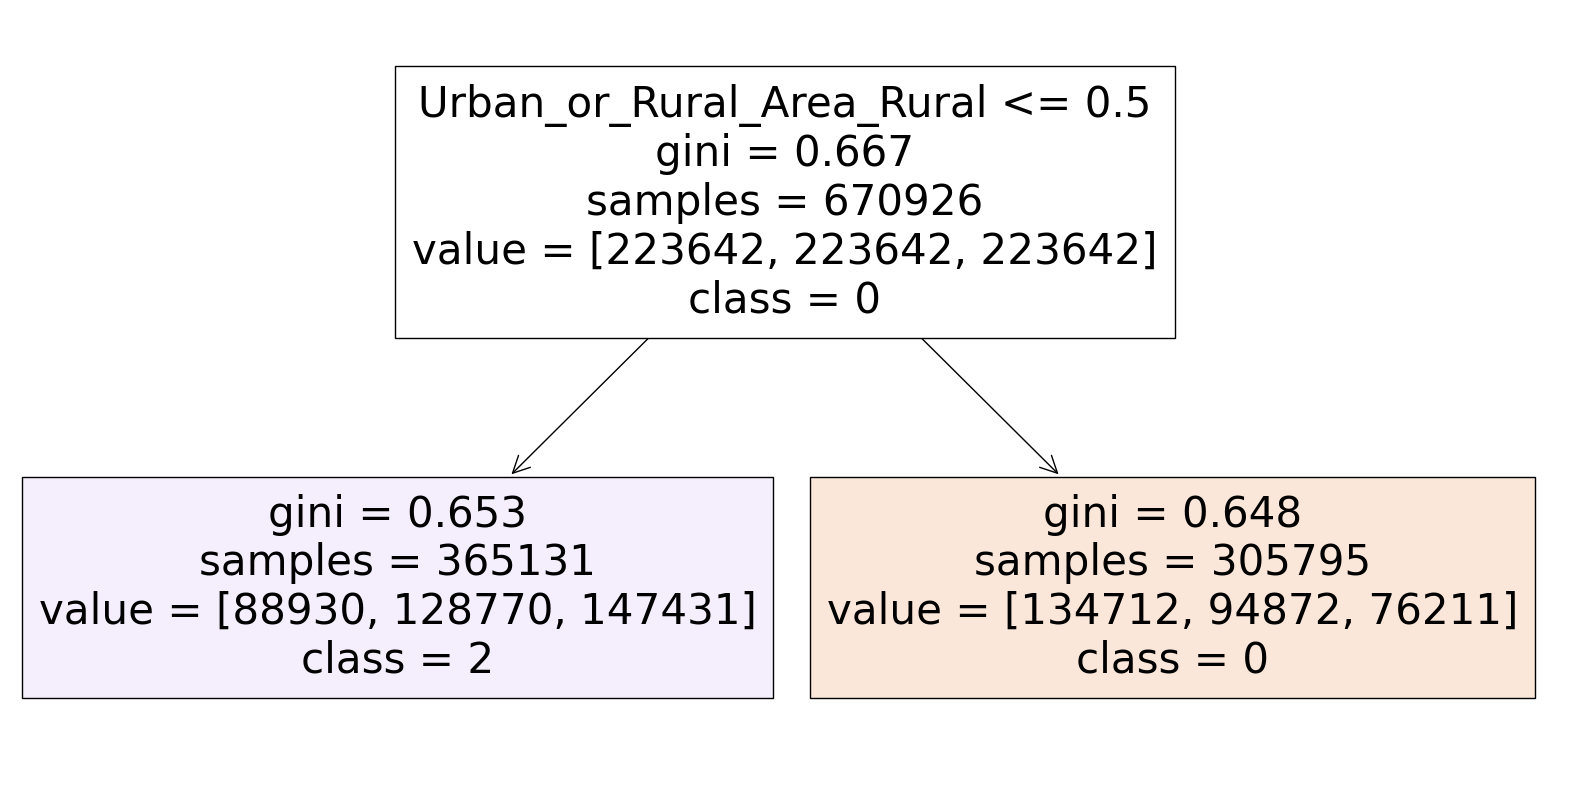

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Carregar os dados
df = pd.read_csv('car_accidentOFICIAL.csv')

# Selecionar as colunas relevantes
df = df[['Urban_or_Rural_Area', 'Accident_Injuries']]

# Remover valores ausentes
df.dropna(inplace=True)

# Codificar as colunas categóricas usando one-hot encoding
df = pd.get_dummies(df, columns=['Urban_or_Rural_Area'])

# Separar as colunas de entrada e a coluna de destino
X = df.drop(columns=['Accident_Injuries'])
y = df['Accident_Injuries']

# Verificar a codificação das classes em y
print("Classes in y before encoding:", y.unique())

# Garantir que y esteja codificado como números inteiros ou categorias (se necessário)
if y.dtype == 'object':
    y = y.astype('category').cat.codes

# Verificar a codificação das classes em y após possível ajuste
print("Classes in y after encoding:", y.unique())

# Converter todas as colunas de X para float
X = X.astype(float)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Aplicar SMOTE para oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Aplicar RandomUnderSampler para undersampling
undersample = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train_smote, y_train_smote)

# Inicializar e treinar o modelo de árvore de decisão
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

# Prever nos dados de teste
y_test_pred = dt.predict(X_test)

# Calcular a acurácia
test_accuracy = accuracy_score(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train_resampled, dt.predict(X_train_resampled))

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_test_pred))

# Visualizar a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=[str(c) for c in dt.classes_], filled=True)
plt.show()

Classes in y before encoding: ['Serious' 'Slight' 'Fatal']
Classes in y after encoding: [1 2 0]
Training Accuracy: 0.39
Test Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.39      0.04       574
           1       0.00      0.00      0.00      5989
           2       0.87      0.77      0.82     39633

    accuracy                           0.67     46196
   macro avg       0.30      0.39      0.29     46196
weighted avg       0.75      0.67      0.70     46196



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


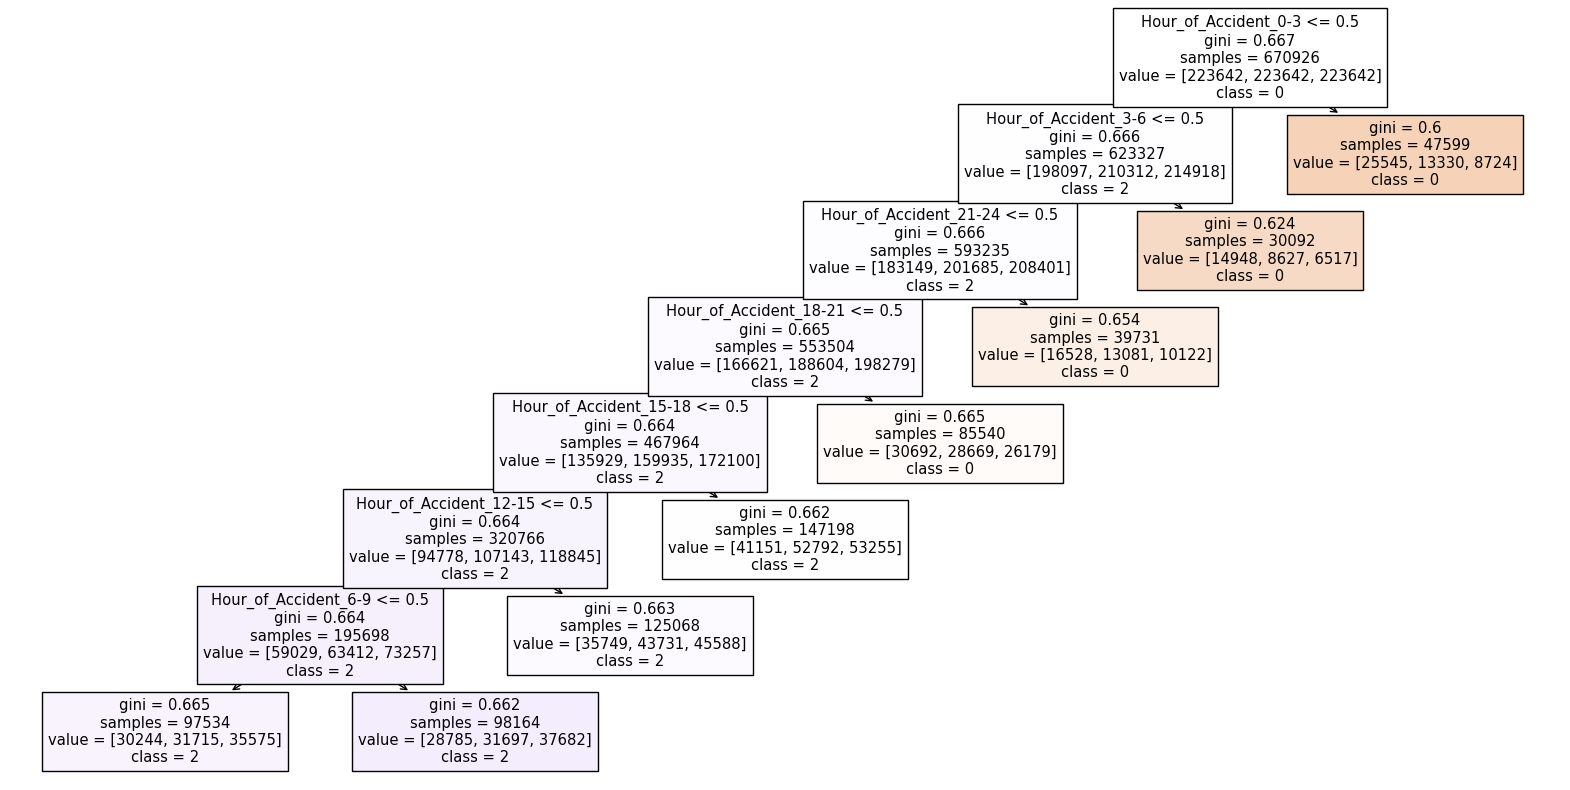

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Carregar os dados
df = pd.read_csv('car_accidentOFICIAL.csv')

# Selecionar as colunas relevantes
df = df[['Hour_of_Accident', 'Accident_Injuries']]

# Remover valores ausentes
df.dropna(inplace=True)

# Codificar as colunas categóricas usando one-hot encoding
df = pd.get_dummies(df, columns=['Hour_of_Accident'])

# Separar as colunas de entrada e a coluna de destino
X = df.drop(columns=['Accident_Injuries'])
y = df['Accident_Injuries']

# Verificar a codificação das classes em y
print("Classes in y before encoding:", y.unique())

# Garantir que y esteja codificado como números inteiros ou categorias (se necessário)
if y.dtype == 'object':
    y = y.astype('category').cat.codes

# Verificar a codificação das classes em y após possível ajuste
print("Classes in y after encoding:", y.unique())

# Converter todas as colunas de X para float
X = X.astype(float)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Aplicar SMOTE para oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Aplicar RandomUnderSampler para undersampling
undersample = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train_smote, y_train_smote)

# Inicializar e treinar o modelo de árvore de decisão
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

# Prever nos dados de teste
y_test_pred = dt.predict(X_test)

# Calcular a acurácia
test_accuracy = accuracy_score(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train_resampled, dt.predict(X_train_resampled))

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_test_pred))

# Visualizar a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=[str(c) for c in dt.classes_], filled=True)
plt.show()